In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# BNA Airport-Flight Delay Analysis: Pre-COVID, During-COVID, and Post-COVID Impact

## Project Overview
This capstone project analyzes flight performance at **Nashville International Airport (BNA)** with a focus on **departure delays, arrival delays, and cancellations** across major U.S. airlines. The goal is to understand how airline operations at BNA were affected **before, during, and after the COVID-19 pandemic**, and how recovery patterns varied by airline.

In [2]:
departures = pd.read_csv('../../data/Departure.csv',encoding='latin1',low_memory=False)

In [3]:
departures.shape

(497696, 16)

In [4]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497696 entries, 0 to 497695
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Carrier Code                              497696 non-null  object
 1   Airlines                                  497696 non-null  object
 2   Date (MM/DD/YYYY)                         497696 non-null  object
 3   Flight Number                             497696 non-null  int64 
 4   Destination Airport                       497696 non-null  object
 5   Destination City                          497696 non-null  object
 6   Scheduled departure time                  497696 non-null  object
 7   Actual departure time                     497673 non-null  object
 8   Scheduled elapsed time (Minutes)          497696 non-null  int64 
 9   Actual elapsed time (Minutes)             497696 non-null  int64 
 10  Departure delay (Minutes)       

In [5]:
departures.isna().sum()

Carrier Code                                 0
Airlines                                     0
Date (MM/DD/YYYY)                            0
Flight Number                                0
Destination Airport                          0
Destination City                             0
Scheduled departure time                     0
Actual departure time                       23
Scheduled elapsed time (Minutes)             0
Actual elapsed time (Minutes)                0
Departure delay (Minutes)                    0
Delay Carrier (Minutes)                      0
Delay Weather (Minutes)                      0
Delay National Aviation System (Minutes)     0
Delay Security (Minutes)                     0
Delay Late Aircraft Arrival (Minutes)        0
dtype: int64

In [6]:
departures.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,1/1/2018,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


##BOM(Byte Order Mark ) issue was there before column name so used (encoding="utf-8-sig) to remove it for all df.

In [7]:
arrivals = pd.read_csv('../../data/Arrivals.csv', encoding='utf-8-sig', low_memory=False)

In [8]:
arrivals.shape

(513001, 16)

In [9]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513001 entries, 0 to 513000
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Carrier Code                              513001 non-null  object
 1   Airlines                                  513001 non-null  object
 2   Date (MM/DD/YYYY)                         513001 non-null  object
 3   Flight Number                             513001 non-null  int64 
 4   Origin Airport                            513001 non-null  object
 5   Origin City                               513001 non-null  object
 6   Scheduled Arrival Time                    513001 non-null  object
 7   Actual Arrival Time                       512744 non-null  object
 8   Scheduled Elapsed Time (Minutes)          513001 non-null  int64 
 9   Actual Elapsed Time (Minutes)             513001 non-null  int64 
 10  Arrival Delay (Minutes)         

In [10]:
origin_nulls = arrivals[arrivals['Origin City'].isna()]
origin_nulls.head()

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)


In [11]:
arrivals.isna().sum()

Carrier Code                                  0
Airlines                                      0
Date (MM/DD/YYYY)                             0
Flight Number                                 0
Origin Airport                                0
Origin City                                   0
Scheduled Arrival Time                        0
Actual Arrival Time                         257
Scheduled Elapsed Time (Minutes)              0
Actual Elapsed Time (Minutes)                 0
Arrival Delay (Minutes)                       0
Delay Carrier (Minutes)                       0
Delay Weather (Minutes)                       0
Delay National Aviation System (Minutes)      0
Delay Security (Minutes)                      0
Delay Late Aircraft Arrival (Minutes)         0
dtype: int64

In [12]:
arrivals.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0
1,AA,American Airlines,1/1/2018,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0


In [13]:
cancellations = pd.read_csv('../../data/Airlines_Cancellation.csv',encoding='utf-8-sig',low_memory=False)

In [14]:
cancellations.shape

(10370, 6)

In [15]:
cancellations.isna().sum()

Carrier Code           0
Airlines               0
Date (MM/DD/YYYY)      0
Flight_Number          0
Destination Airport    0
Destination City       0
dtype: int64

### Data Cleaning & Preparation (Excel + Python)

- The original dataset contained several missing (null) values.
- Initial data cleaning was performed in **Excel** before importing the data into Python.
- The columns were removed in Excel due to high null counts and limited analytical value.
- After cleaning, the updated CSV files were imported into the Jupyter Notebook for further analysis.
- A new column (City) was created to map **airport codes** to their corresponding **city and state** using a lookup approach.

### DataFrames Used for Analysis

 **Departure DataFrame**  
  Contains information related to scheduled vs actual departure times, departure delays, and associated factors.


In [16]:
departures.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,1/1/2018,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


###Rename and changed the Date columns

In [17]:
departures.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [18]:
departures['Flight Date'] = pd.to_datetime(departures['Flight Date'])

In [19]:
departures = departures[departures['Flight Date'].dt.year <= 2024]

In [20]:
departures.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,2018-01-01,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0
1,AA,American Airlines,2018-01-01,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15


- **Arrival DataFrame**  
  Includes arrival times, arrival delays, and on-time performance metrics for inbound flights.

In [21]:
arrivals.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,American Airlines,1/1/2018,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0
1,AA,American Airlines,1/1/2018,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0


In [22]:
arrivals.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [23]:
arrivals['Flight Date'] = pd.to_datetime(arrivals['Flight Date'])

- **Cancellation DataFrame**  
  Focuses on flight cancellations and related attributes such as airline, airport, and date.

In [24]:
arrivals = arrivals[arrivals['Flight Date'].dt.year <= 2024]

In [25]:
cancellations.head(2)

,Carrier Code,Airlines,Date (MM/DD/YYYY),Flight_Number,Destination Airport,Destination City
0,AA,American Airlines,1/4/2018,469,PHL,"Philadelphia, PA"
1,AA,American Airlines,1/8/2018,1899,PHL,"Philadelphia, PA"


In [26]:
cancellations.rename(columns={'Date (MM/DD/YYYY)':'Flight Date'},inplace =True)

In [27]:
cancellations['Flight Date'] = pd.to_datetime(cancellations['Flight Date'])

In [28]:
cancellations = cancellations[cancellations['Flight Date'].dt.year <= 2024]

### Created Covid Phase column for Departures,Arrivals and Cancellation 

## Departures

In [29]:
def covid_phase(date):
    if date < pd.Timestamp('2020-01-01'):
        return 'Pre-COVID'
    elif date <= pd.Timestamp('2021-12-31'):
        return 'During-COVID'
    else:
        return 'Post-COVID'

In [30]:
departures['COVID_Phase'] = departures['Flight Date'].apply(covid_phase)

In [31]:
departures['Month'] = departures['Flight Date'].dt.to_period('M').dt.to_timestamp()

In [32]:
departures.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),COVID_Phase,Month
0,AA,American Airlines,2018-01-01,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0,Pre-COVID,2018-01-01
1,AA,American Airlines,2018-01-01,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15,Pre-COVID,2018-01-01


## Total number of Departed  flights by Year and Covid Phase

In [33]:
departures['Year'] = departures['Flight Date'].dt.year

In [34]:
total_dep_flights = departures.groupby(['Year','COVID_Phase']).size().reset_index(name= 'Total Departure Flights')
total_dep_flights

,Year,COVID_Phase,Total Departure Flights
0,2018,Pre-COVID,54770
1,2019,Pre-COVID,62791
2,2020,During-COVID,46440
3,2021,During-COVID,56612
4,2022,Post-COVID,67999
5,2023,Post-COVID,78471
6,2024,Post-COVID,81201


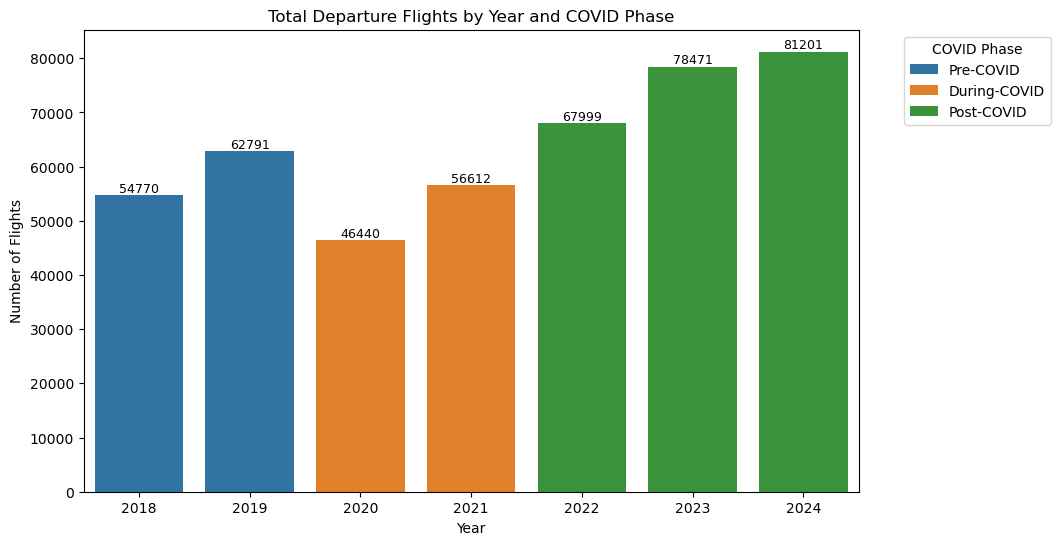

In [35]:
covidphase_colors = {'Pre-COVID':'#1f77b4', 'During-COVID':'#ff7f0e', 'Post-COVID':'#2ca02c'}
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_dep_flights,x='Year',y='Total Departure Flights',hue='COVID_Phase',palette=covidphase_colors)
plt.title('Total Departure Flights by Year and COVID Phase')
plt.ylabel('Number of Flights')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)
plt.savefig('Total_dep_flights.png', dpi=300)    

In [36]:
departures['COVID_Phase'].value_counts()

COVID_Phase
Post-COVID      227671
Pre-COVID       117561
During-COVID    103052
Name: count, dtype: int64

In [37]:
monthly_dep_delay = (departures.groupby(['Month', 'COVID_Phase'])['Departure delay (Minutes)'].mean().reset_index())

In [38]:
monthly_dep_delay = monthly_dep_delay.sort_values('Month')

In [39]:
monthly_dep_delay.head()

,Month,COVID_Phase,Departure delay (Minutes)
0,2018-01-01,Pre-COVID,7.862438
1,2018-02-01,Pre-COVID,8.518284
2,2018-03-01,Pre-COVID,8.747007
3,2018-04-01,Pre-COVID,10.608382
4,2018-05-01,Pre-COVID,13.319888


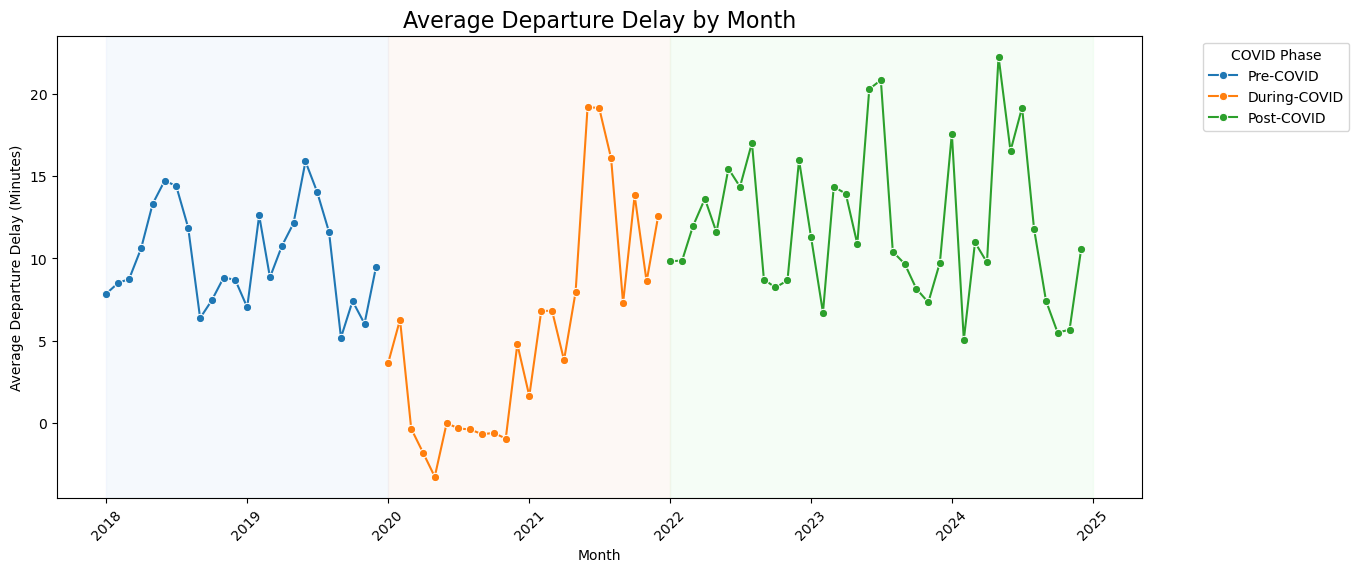

In [139]:
plt.figure(figsize=(14,6))
### Line plot for average departure delay
sns.lineplot(data=monthly_dep_delay,x='Month',y='Departure delay (Minutes)',hue='COVID_Phase',palette=['#1f77b4','#ff7f0e','#2ca02c'],marker='o')
### Add shaded regions for COVID phases
plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-12-31'), color='#d0e1f9', alpha=0.2)  # Pre-COVID
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='#f9e0d0', alpha=0.2)  # During-COVID
plt.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31'), color='#d0f9d6', alpha=0.2)  # Post-COVID
### Labels and title
plt.title('Average Departure Delay by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Covid_Departure_trend.png', dpi=300)

###Which airlines were most impacted during each covid phase..

In [41]:
### Group by Airline and COVID Phase
airline_dep_delay = (departures.groupby(['Airlines', 'COVID_Phase'])['Departure delay (Minutes)'].mean().reset_index())

In [42]:
airline_dep_delay = airline_dep_delay.sort_values(['COVID_Phase', 'Departure delay (Minutes)'], ascending=[True, False])

In [43]:
airline_dep_delay.head(5)

,Airlines,COVID_Phase,Departure delay (Minutes)
21,United Airlines,During-COVID,9.527340
18,Spirit Airlines,During-COVID,8.873736
12,JetBlue Airways,During-COVID,8.438309
3,American Airlines,During-COVID,7.087473
15,Southwest Airlines,During-COVID,6.989967


In [124]:
airline_order = [
    'Delta Airlines',
    'American Airlines',
    'United Airlines',
    'Southwest Airlines',
    'JetBlue Airways',
    'Alaska Airlines',
    'Spirit Airlines',
    'Frontier Airlines'
]

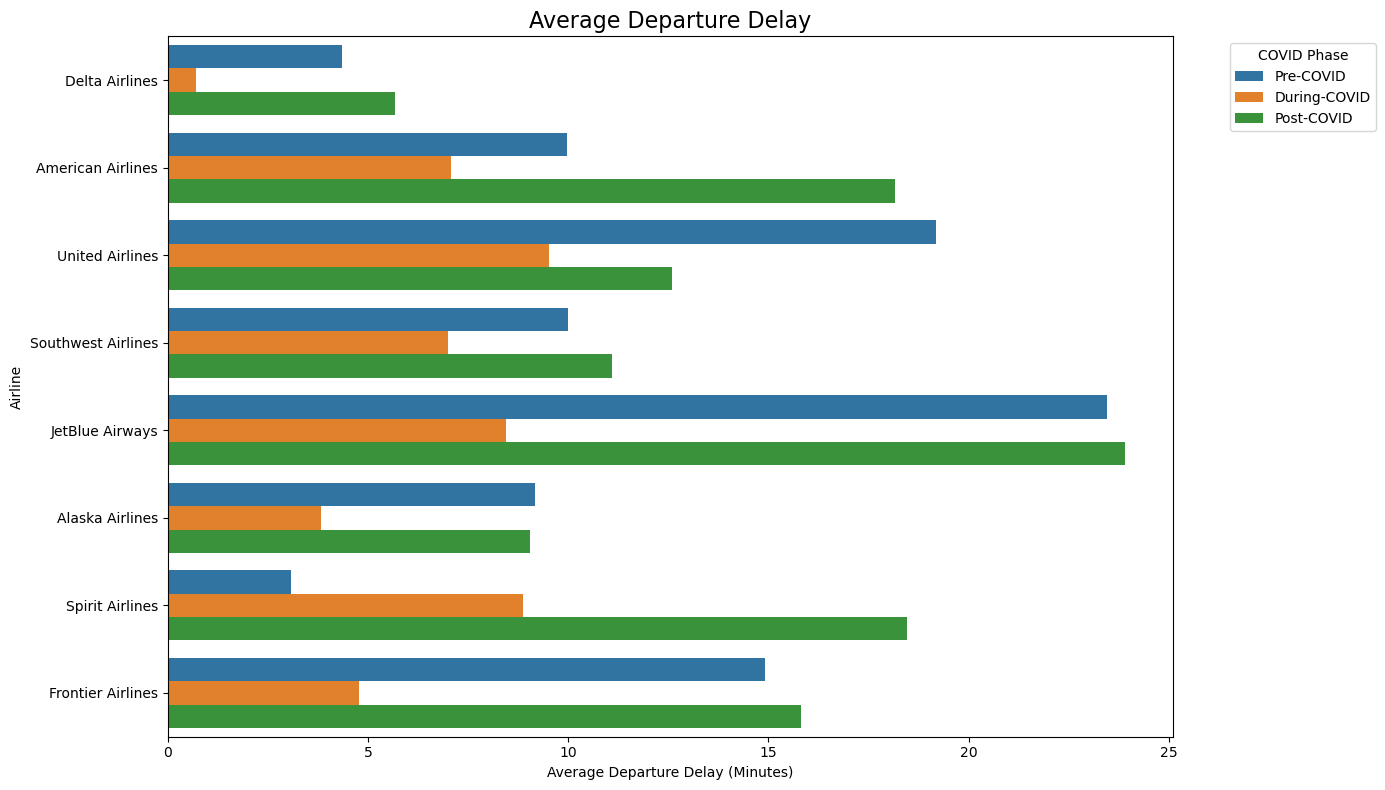

In [131]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data=airline_dep_delay,
    x='Departure delay (Minutes)',
    y='Airlines',
    hue='COVID_Phase',
    order=airline_order,   # 👈 THIS controls the structure
    hue_order=['Pre-COVID', 'During-COVID', 'Post-COVID']
)

plt.title('Average Departure Delay', fontsize=16)
plt.xlabel('Average Departure Delay (Minutes)')
plt.ylabel('Airline')

plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('airline_dep_delay_chart.png', dpi=300)

### Departure Delay Causes- What caused flights to depart late across covid phase?

In [45]:
departures.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Destination Airport,Destination City,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),COVID_Phase,Month,Year
0,AA,American Airlines,2018-01-01,469,PHL,"Philadelphia, PA",9:24:00 AM,9:35:00 AM,124,109,11,0,0,0,0,0,Pre-COVID,2018-01-01,2018
1,AA,American Airlines,2018-01-01,602,DFW,"DallasFort Worth, TX",8:51:00 PM,9:13:00 PM,139,132,22,0,0,0,0,15,Pre-COVID,2018-01-01,2018


In [46]:
dep_delay_causes=(departures.groupby('Year',as_index=False).agg({'Delay Carrier (Minutes)':'mean','Delay Weather (Minutes)':'mean','Delay Security (Minutes)':'mean','Delay Late Aircraft Arrival (Minutes)':'mean','Delay National Aviation System (Minutes)':'mean'}))

In [47]:
dep_delay_causes = dep_delay_causes.set_index('Year').sort_index()

<Figure size 1400x700 with 0 Axes>

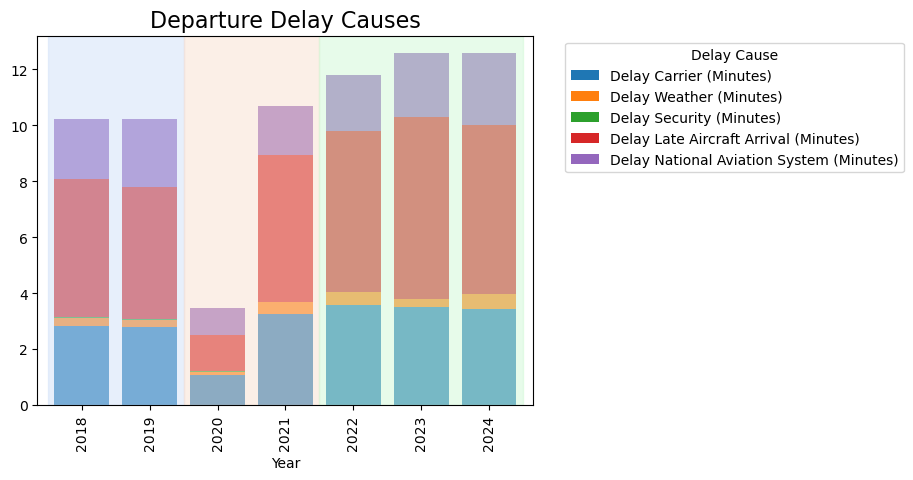

In [83]:
plt.figure(figsize=(14,7))
dep_delay_causes.plot(kind='bar', stacked=True, width=0.8)
plt.axvspan(-0.5,
            dep_delay_causes.index.get_loc(2020) - 0.5,
            color='#d0e1f9', alpha=0.50)
plt.axvspan(dep_delay_causes.index.get_loc(2020) - 0.5,
            dep_delay_causes.index.get_loc(2021) + 0.5,
            color='#f9e0d0', alpha=0.50)
plt.axvspan(dep_delay_causes.index.get_loc(2022) - 0.5,
            len(dep_delay_causes) - 0.5,
            color='#d0f9d6', alpha=0.50)
plt.title('Departure Delay Causes', fontsize=16)
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Dep_delay_causes.png', dpi=300)

## Same for Arrivals to compare for avergae delay analysis--

In [49]:
arrivals['Flight Date'] = pd.to_datetime(arrivals['Flight Date'])

In [50]:
arrivals['Month'] = arrivals['Flight Date'].dt.to_period('M').dt.to_timestamp()

In [51]:
arrivals['Year'] = arrivals['Flight Date'].dt.year

In [52]:
arrivals['COVID_Phase'] = arrivals['Flight Date'].apply(covid_phase)

In [53]:
arrivals.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Month,Year,COVID_Phase
0,AA,American Airlines,2018-01-01,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0,2018-01-01,2018,Pre-COVID
1,AA,American Airlines,2018-01-01,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0,2018-01-01,2018,Pre-COVID


## Total number of arrivals flight by Year and Covid Phase

In [54]:
total_arr_flights = arrivals.groupby(['Year','COVID_Phase']).size().reset_index(name= 'Total Arrivals Flights')
total_arr_flights

,Year,COVID_Phase,Total Arrivals Flights
0,2018,Pre-COVID,54767
1,2019,Pre-COVID,62795
2,2020,During-COVID,46444
3,2021,During-COVID,56608
4,2022,Post-COVID,68005
5,2023,Post-COVID,78474
6,2024,Post-COVID,81198


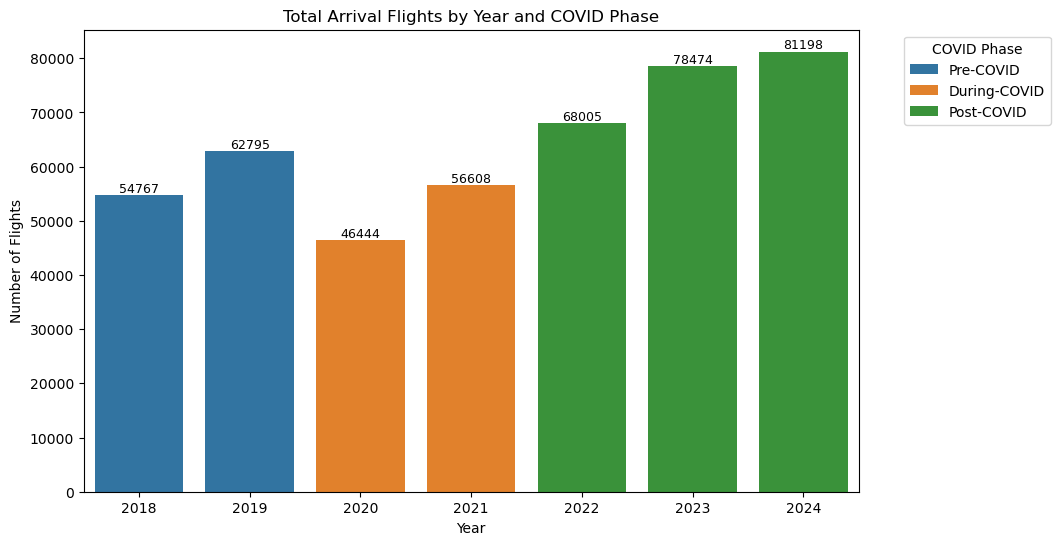

In [55]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_arr_flights,x='Year',y='Total Arrivals Flights',hue='COVID_Phase',palette=covidphase_colors)
plt.title('Total Arrival Flights by Year and COVID Phase')
plt.ylabel('Number of Flights')
plt.xlabel('Year')
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)
plt.savefig('Total_arr_flights.png', dpi=300) 

In [56]:
##Grouped month and covid phase to get average arrivals delay
monthly_arr_delay = (arrivals.groupby(['Month','COVID_Phase'])['Arrival Delay (Minutes)'].mean().reset_index())

In [57]:
monthly_arr_delay = monthly_arr_delay.sort_values('Month')

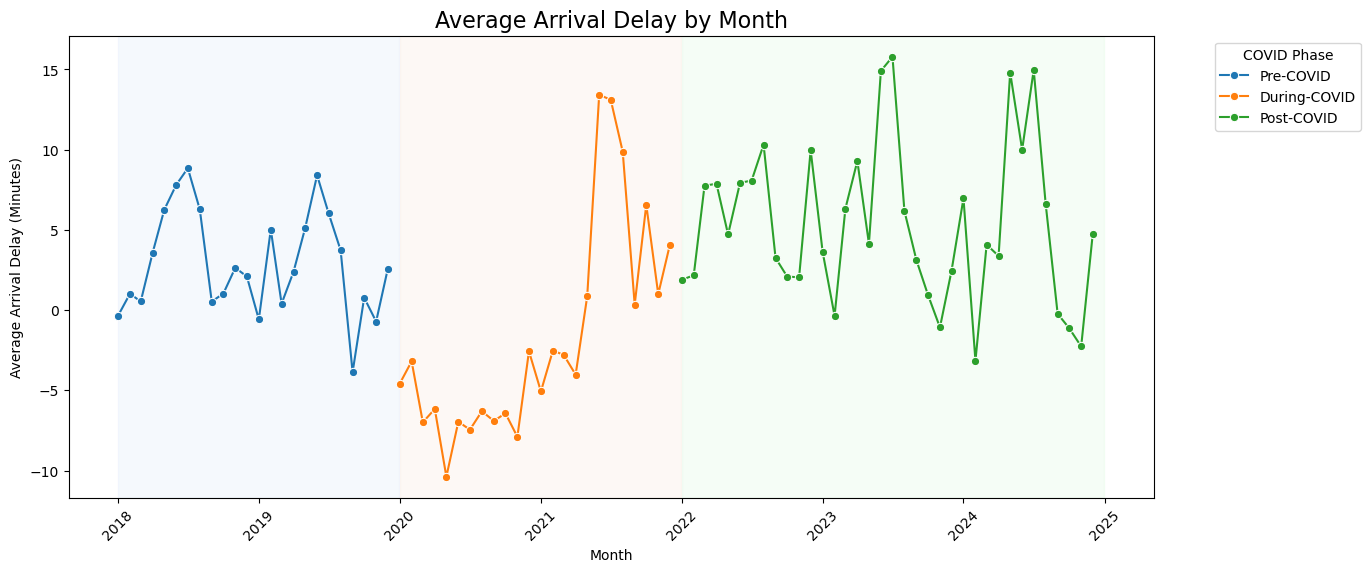

In [58]:
plt.figure(figsize=(14,6))
### Line plot for average departure delay
sns.lineplot(data=monthly_arr_delay,x='Month',y='Arrival Delay (Minutes)',hue='COVID_Phase',palette=['#1f77b4','#ff7f0e','#2ca02c'],marker='o')
### Add shaded regions for COVID phases
plt.axvspan(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-12-31'), color='#d0e1f9', alpha=0.2)  # Pre-COVID
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='#f9e0d0', alpha=0.2)  # During-COVID
plt.axvspan(pd.Timestamp('2022-01-01'), pd.Timestamp('2024-12-31'), color='#d0f9d6', alpha=0.2)  # Post-COVID
### Labels and title
plt.title('Average Arrival Delay by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=45)
### Move legend outside plot
plt.legend(title='COVID Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Covid_Arrival_trend.png', dpi=300)

In [59]:
## to see airline -### Group by Airline and COVID Phase
airline_arr_delay = (arrivals.groupby(['Airlines', 'COVID_Phase'])['Arrival Delay (Minutes)'].mean().reset_index())

In [60]:
airline_arr_delay = airline_arr_delay.sort_values(['COVID_Phase', 'Arrival Delay (Minutes)'], ascending=[True, False])

In [61]:
airline_arr_delay.head(2)

,Airlines,COVID_Phase,Arrival Delay (Minutes)
18,Spirit Airlines,During-COVID,1.813499
12,JetBlue Airways,During-COVID,1.267711


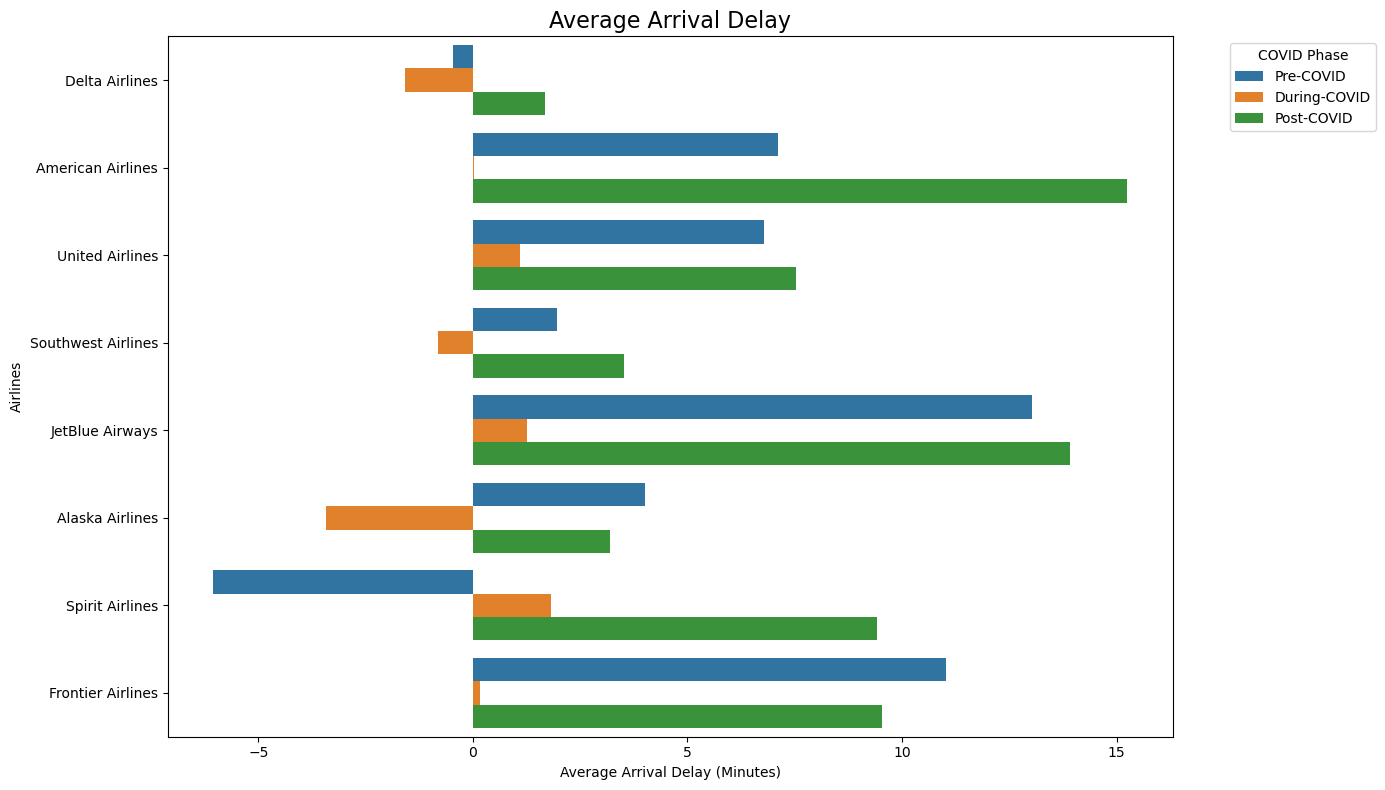

In [130]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=airline_arr_delay,
    x='Arrival Delay (Minutes)',
    y='Airlines',
    hue='COVID_Phase',
    order=airline_order,   # 👈 THIS is the key update
    hue_order=['Pre-COVID', 'During-COVID', 'Post-COVID'])
plt.title('Average Arrival Delay', fontsize=16)
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Airlines')
plt.legend(
    title='COVID Phase',
    bbox_to_anchor=(1.05, 1),
    loc='upper left')
plt.tight_layout()
plt.savefig('airline_arrival_delay.png', dpi=300)

### What caused flights to arrive late across COVID phases?

In [63]:
arr_delay_causes=(arrivals.groupby('Year',as_index=False).agg({'Delay Carrier (Minutes)':'mean','Delay Weather (Minutes)':'mean','Delay Security (Minutes)':'mean','Delay Late Aircraft Arrival (Minutes)':'mean','Delay National Aviation System (Minutes)':'mean'}))

In [64]:
arr_delay_causes

,Year,Delay Carrier (Minutes),Delay Weather (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Delay National Aviation System (Minutes)
0,2018,3.311027,0.447751,0.019318,4.568390,1.186207
1,2019,3.344773,0.398790,0.021881,4.309483,1.268779
2,2020,1.331324,0.141913,0.005469,1.030854,0.610413
3,2021,3.738588,0.331190,0.043739,4.700290,1.307306
4,2022,4.537387,0.380428,0.034689,5.505786,1.569796
5,2023,4.079746,0.406937,0.042778,5.432627,1.888358
6,2024,3.712468,0.366191,0.033326,5.932203,1.704106


In [65]:
arr_delay_causes = arr_delay_causes.set_index('Year').sort_index()

<Figure size 1400x700 with 0 Axes>

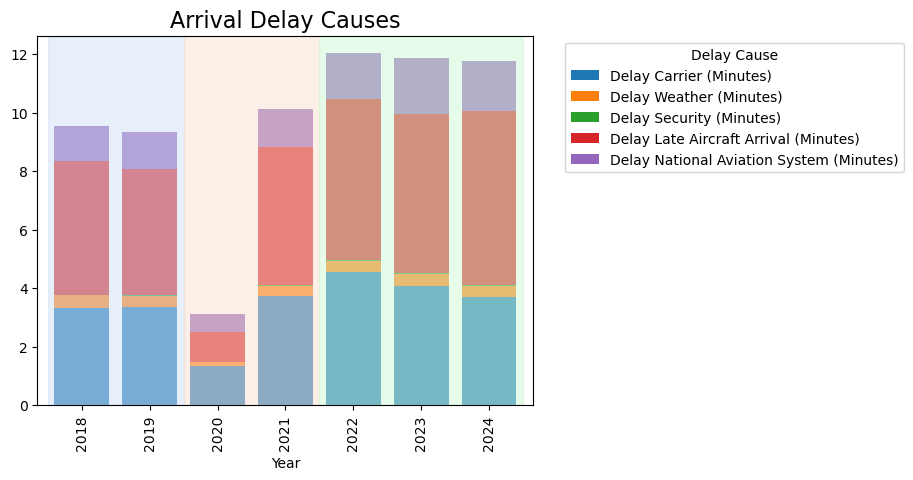

In [138]:
plt.figure(figsize=(14,7))
arr_delay_causes.plot(kind='bar',stacked=True,width=0.8)
plt.axvspan(-0.5, arr_delay_causes.index.get_loc(2020)-0.5,color='#d0e1f9', alpha=0.50)
plt.axvspan(arr_delay_causes.index.get_loc(2020)-0.5,arr_delay_causes.index.get_loc(2021)+0.5,color='#f9e0d0', alpha=0.50)
plt.axvspan(arr_delay_causes.index.get_loc(2022)-0.5,len(arr_delay_causes)-0.5,color='#d0f9d6', alpha=0.50)
plt.title('Arrival Delay Causes', fontsize=16)
plt.legend(title='Delay Cause',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.savefig('Arr_delay_causes.png', dpi=300)

### Cancellation---We Know Covid Impacted but what % of rate in cancellation and how did recovery look post-Covid?

In [88]:
cancellations['Year'] = cancellations['Flight Date'].dt.year

In [89]:
cancellations

,Carrier Code,Airlines,Flight Date,Flight_Number,Destination Airport,Destination City,Year,COVID_Phase
0,AA,American Airlines,2018-01-04,469,PHL,"Philadelphia, PA",2018,Pre-COVID
1,AA,American Airlines,2018-01-08,1899,PHL,"Philadelphia, PA",2018,Pre-COVID
2,AA,American Airlines,2018-01-11,1439,DFW,"Dallas–Fort Worth, TX",2018,Pre-COVID
3,AA,American Airlines,2018-01-17,1694,CLT,"Charlotte, NC",2018,Pre-COVID
4,AA,American Airlines,2018-01-17,1736,CLT,"Charlotte, NC",2018,Pre-COVID
...,...,...,...,...,...,...,...,...
10013,WN,Southwest Airlines,2024-12-20,3034,SAN,"San Diego, CA",2024,Post-COVID
10014,WN,Southwest Airlines,2024-12-20,3239,BOS,"Boston, MA",2024,Post-COVID
10015,WN,Southwest Airlines,2024-12-28,2435,DAL,"Dallas, TX",2024,Post-COVID
10016,WN,Southwest Airlines,2024-12-29,6310,TPA,"Tampa, FL",2024,Post-COVID


In [90]:
cancellations['COVID_Phase'] = cancellations['Flight Date'].apply(covid_phase)

In [91]:
cancelled_flights = cancellations.groupby(['Year','COVID_Phase']).size().reset_index(name='Cancelled Flights')

##Merged total_dep_flights to cancellation df  to get ratio..

In [92]:
yearly_cancel = total_dep_flights.merge(cancelled_flights,on=['Year','COVID_Phase'],how='left')

In [93]:
yearly_cancel['Cancellation Rate (%)'] = (yearly_cancel['Cancelled Flights'] / yearly_cancel['Total Departure Flights']) * 100

In [94]:
yearly_cancel.dtypes

Year                         int32
COVID_Phase                 object
Total Departure Flights      int64
Cancelled Flights            int64
Cancellation Rate (%)      float64
dtype: object

In [95]:
yearly_cancel['Year'] = yearly_cancel['Year'].astype(int)

In [96]:
yearly_cancel

,Year,COVID_Phase,Total Departure Flights,Cancelled Flights,Cancellation Rate (%)
0,2018,Pre-COVID,54770,579,1.057148
1,2019,Pre-COVID,62791,897,1.428549
2,2020,During-COVID,46440,3173,6.832472
3,2021,During-COVID,56612,1132,1.999576
4,2022,Post-COVID,67999,2097,3.083869
5,2023,Post-COVID,78471,896,1.141823
6,2024,Post-COVID,81201,938,1.155158


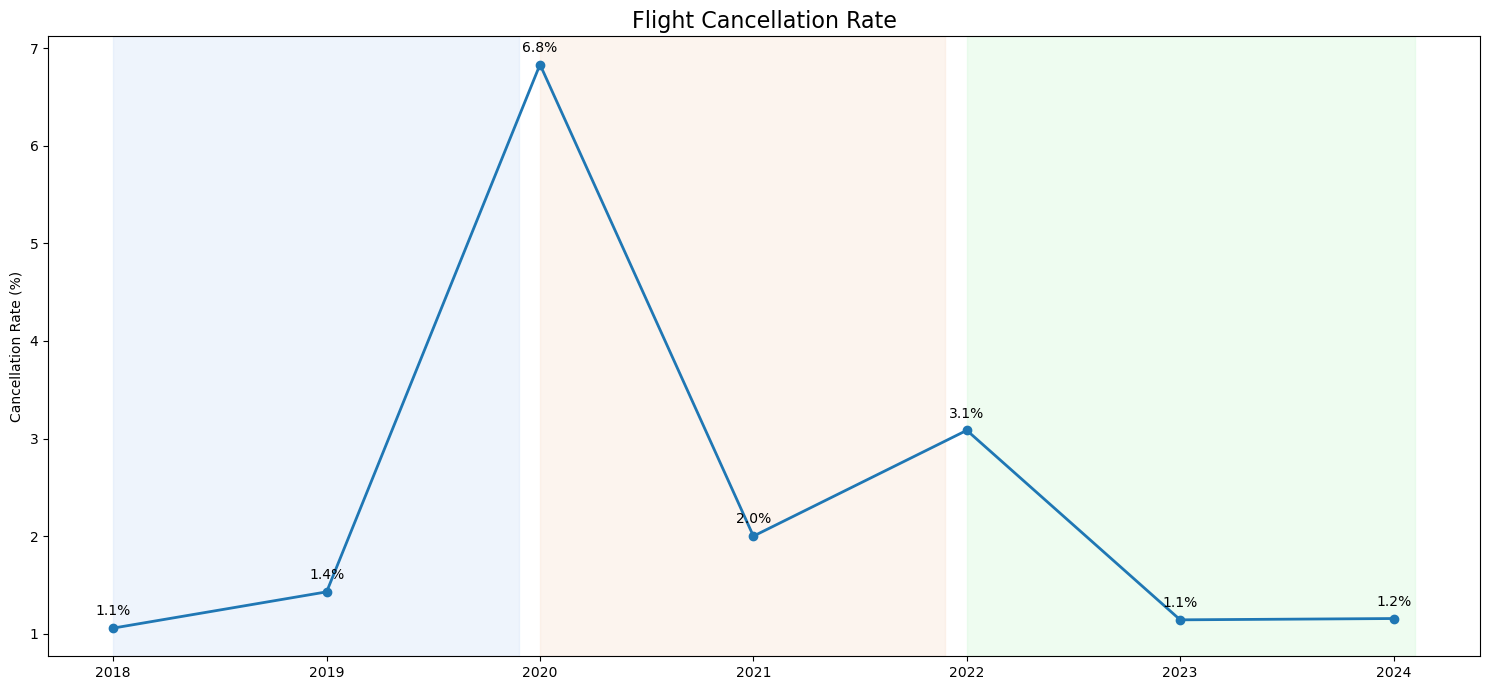

In [97]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(yearly_cancel['Year'], yearly_cancel['Cancellation Rate (%)'], marker='o', linewidth=2)
# COVID shading
ax.axvspan(2018, 2019.9, color='#d0e1f9', alpha=0.35)   # Pre-COVID
ax.axvspan(2020, 2021.9, color='#f9e0d0', alpha=0.35)   # During-COVID
ax.axvspan(2022, 2024.1, color='#d0f9d6', alpha=0.35)   # Post-COVID
# Annotate cancellation rate above each marker
for x, y in zip(yearly_cancel['Year'], yearly_cancel['Cancellation Rate (%)']):
    ax.text(x, y + 0.1, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color='black')
ax.set_title('Flight Cancellation Rate', fontsize=16)
ax.set_ylabel('Cancellation Rate (%)')
ax.set_xticks(yearly_cancel['Year'])
plt.tight_layout()
plt.savefig('Flight Cancellation Rate.png', dpi=300)

### Did higher Arrival delay was the reason for cancellation?

In [98]:
yearly_arr_delay = arrivals.groupby('Year')['Arrival Delay (Minutes)'].mean().reset_index()
yearly_arr_delay.rename(columns={'Arrival Delay (Minutes)': 'Avg Arrival Delay (min)'}, inplace=True)

In [99]:
yearly_analysis = pd.merge(yearly_cancel, yearly_arr_delay, on='Year', how='left')

In [100]:
yearly_analysis

,Year,COVID_Phase,Total Departure Flights,Cancelled Flights,Cancellation Rate (%),Avg Arrival Delay (min)
0,2018,Pre-COVID,54770,579,1.057148,3.456571
1,2019,Pre-COVID,62791,897,1.428549,2.431690
2,2020,During-COVID,46440,3173,6.832472,-6.071592
3,2021,During-COVID,56612,1132,1.999576,3.787239
4,2022,Post-COVID,67999,2097,3.083869,5.695037
5,2023,Post-COVID,78471,896,1.141823,5.493463
6,2024,Post-COVID,81201,938,1.155158,5.109227


In [101]:
pd.merge(total_arr_flights,yearly_analysis,on=['Year','COVID_Phase'],how='left')

,Year,COVID_Phase,Total Arrivals Flights,Total Departure Flights,Cancelled Flights,Cancellation Rate (%),Avg Arrival Delay (min)
0,2018,Pre-COVID,54767,54770,579,1.057148,3.456571
1,2019,Pre-COVID,62795,62791,897,1.428549,2.431690
2,2020,During-COVID,46444,46440,3173,6.832472,-6.071592
3,2021,During-COVID,56608,56612,1132,1.999576,3.787239
4,2022,Post-COVID,68005,67999,2097,3.083869,5.695037
5,2023,Post-COVID,78474,78471,896,1.141823,5.493463
6,2024,Post-COVID,81198,81201,938,1.155158,5.109227


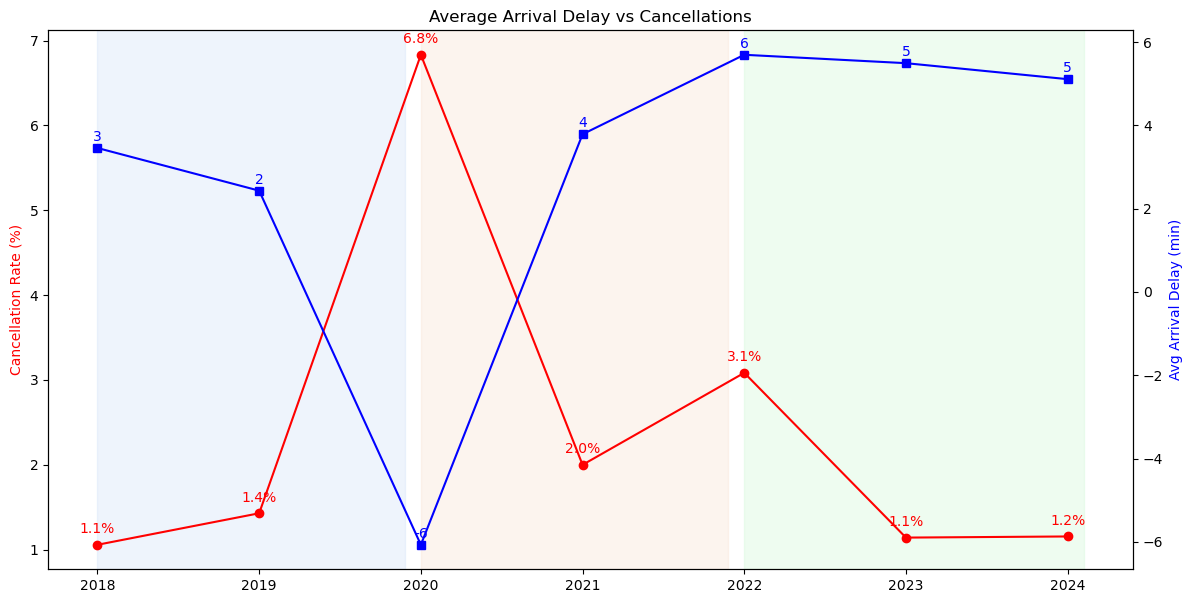

In [102]:
fig, ax1 = plt.subplots(figsize=(14,7))
### Cancellation rate
ax1.plot(yearly_analysis['Year'], yearly_analysis['Cancellation Rate (%)'], marker='o', color='red', label='Cancellation Rate (%)')
ax1.set_ylabel('Cancellation Rate (%)', color='red')
ax1.axvspan(2018, 2019.9, color='#d0e1f9', alpha=0.35)   # Pre-COVID
ax1.axvspan(2020, 2021.9, color='#f9e0d0', alpha=0.35)   # During-COVID
ax1.axvspan(2022, 2024.1, color='#d0f9d6', alpha=0.35)   # Post-COVID
### Annotate cancellation rate
for x, y in zip(yearly_analysis['Year'], yearly_analysis['Cancellation Rate (%)']):
    ax1.text(x, y + 0.1, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, color='red')
### Average arrival delay
ax2 = ax1.twinx()
ax2.plot(yearly_analysis['Year'], yearly_analysis['Avg Arrival Delay (min)'], marker='s', color='blue', label='Avg Arrival Delay')
ax2.set_ylabel('Avg Arrival Delay (min)', color='blue')
for x, y in zip(yearly_analysis['Year'], yearly_analysis['Avg Arrival Delay (min)']):
    ax2.text(x, y + 0.1, f'{y:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
plt.title('Average Arrival Delay vs Cancellations')
plt.xticks(yearly_analysis['Year'])
plt.savefig('Avg Arrival delay vs Cancellation.png', dpi=300)

In [103]:
yearly_analysis[['Cancellation Rate (%)', 'Avg Arrival Delay (min)']].corr()

,Cancellation Rate (%),Avg Arrival Delay (min)
Cancellation Rate (%),1.000000,-0.865397
Avg Arrival Delay (min),-0.865397,1.000000


###Its a strong negative co relation when avg arrival delay were higher,cancellation rates tended to be lower and vice verso ,it could be the reson there were fewer flights##Airlines might canceled more flights proactively,so the flight that actually flew had shorter delays led to higher cancellation.

# Airline Performances

## Which airline had the most cancellation? and how did it vary across Civid Phase?

In [104]:
## get cancelled flight per airline per year
cancel_yearly_air = cancellations.groupby(['Airlines','Year']).size().reset_index(name='Cancelled Flights')

In [105]:
cancel_yearly_air

,Airlines,Year,Cancelled Flights
0,Alaska Airlines,2018,3
1,Alaska Airlines,2019,5
2,Alaska Airlines,2020,19
3,Alaska Airlines,2021,13
4,Alaska Airlines,2022,18
5,Alaska Airlines,2023,7
6,Alaska Airlines,2024,13
7,American Airlines,2018,104
8,American Airlines,2019,124
9,American Airlines,2020,318


In [106]:
total_yearly_airline = departures.groupby(['Airlines','Year']).size().reset_index(name='Total Departure Flights')

In [107]:
total_yearly_airline

,Airlines,Year,Total Departure Flights
0,Alaska Airlines,2018,705
1,Alaska Airlines,2019,931
2,Alaska Airlines,2020,513
3,Alaska Airlines,2021,645
4,Alaska Airlines,2022,695
5,Alaska Airlines,2023,834
6,Alaska Airlines,2024,1213
7,American Airlines,2018,6615
8,American Airlines,2019,7086
9,American Airlines,2020,4735


In [108]:
airline_yearly_cancel = pd.merge(total_yearly_airline, cancel_yearly_air, on=['Airlines','Year'], how='left')

In [109]:
###To get Cancellation rate by airline wise
airline_yearly_cancel['Cancellation Rate (%)'] = (airline_yearly_cancel['Cancelled Flights'] / airline_yearly_cancel['Total Departure Flights'])*100

In [110]:
airline_yearly_cancel

,Airlines,Year,Total Departure Flights,Cancelled Flights,Cancellation Rate (%)
0,Alaska Airlines,2018,705,3,0.425532
1,Alaska Airlines,2019,931,5,0.537057
2,Alaska Airlines,2020,513,19,3.703704
3,Alaska Airlines,2021,645,13,2.015504
4,Alaska Airlines,2022,695,18,2.589928
5,Alaska Airlines,2023,834,7,0.839329
6,Alaska Airlines,2024,1213,13,1.071723
7,American Airlines,2018,6615,104,1.572184
8,American Airlines,2019,7086,124,1.749929
9,American Airlines,2020,4735,318,6.715945


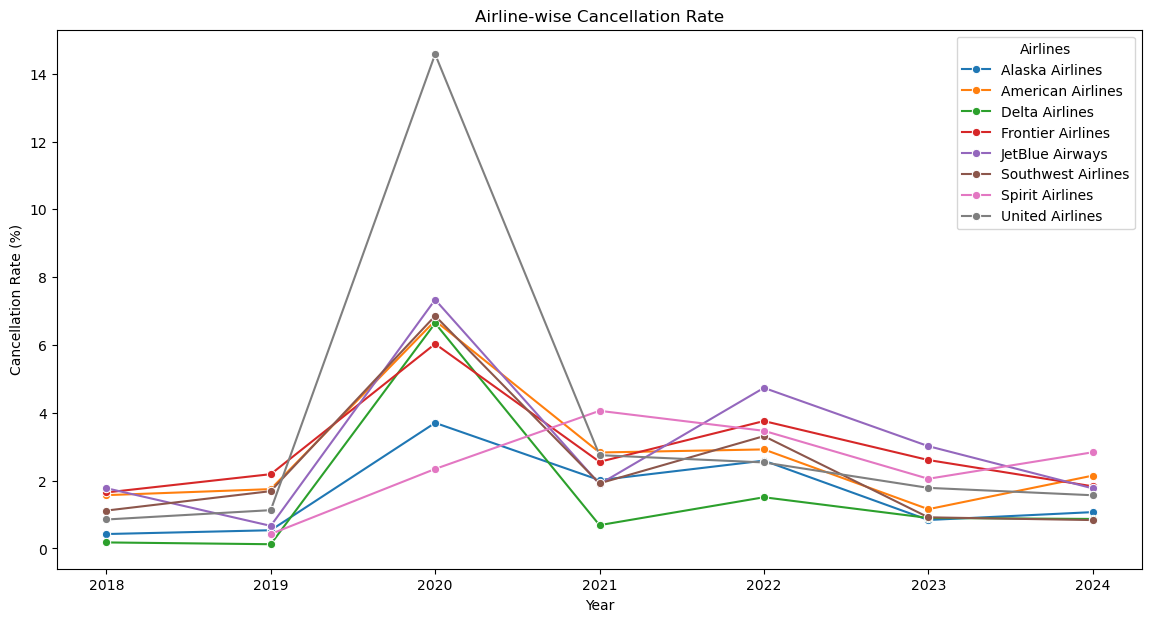

In [111]:
plt.figure(figsize=(14,7))
sns.lineplot(data=airline_yearly_cancel, x='Year', y='Cancellation Rate (%)', hue='Airlines', marker='o')
plt.title('Airline-wise Cancellation Rate')
plt.ylabel('Cancellation Rate (%)')
plt.savefig('Airline -wise Cancellation rate.png', dpi=300)

In [112]:
### Average cause of delay by each airlines.
delay_causes_by_airlines = departures.groupby(['Airlines','COVID_Phase'])[['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)','Delay National Aviation System (Minutes)']].mean().reset_index()

In [113]:
delay_causes_by_airlines.head(2)

,Airlines,COVID_Phase,Delay Carrier (Minutes),Delay Weather (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Delay National Aviation System (Minutes)
0,Alaska Airlines,During-COVID,2.985320,0.809154,0.035406,1.591537,2.940415
1,Alaska Airlines,Post-COVID,3.435084,0.663020,0.030999,2.888038,3.110868


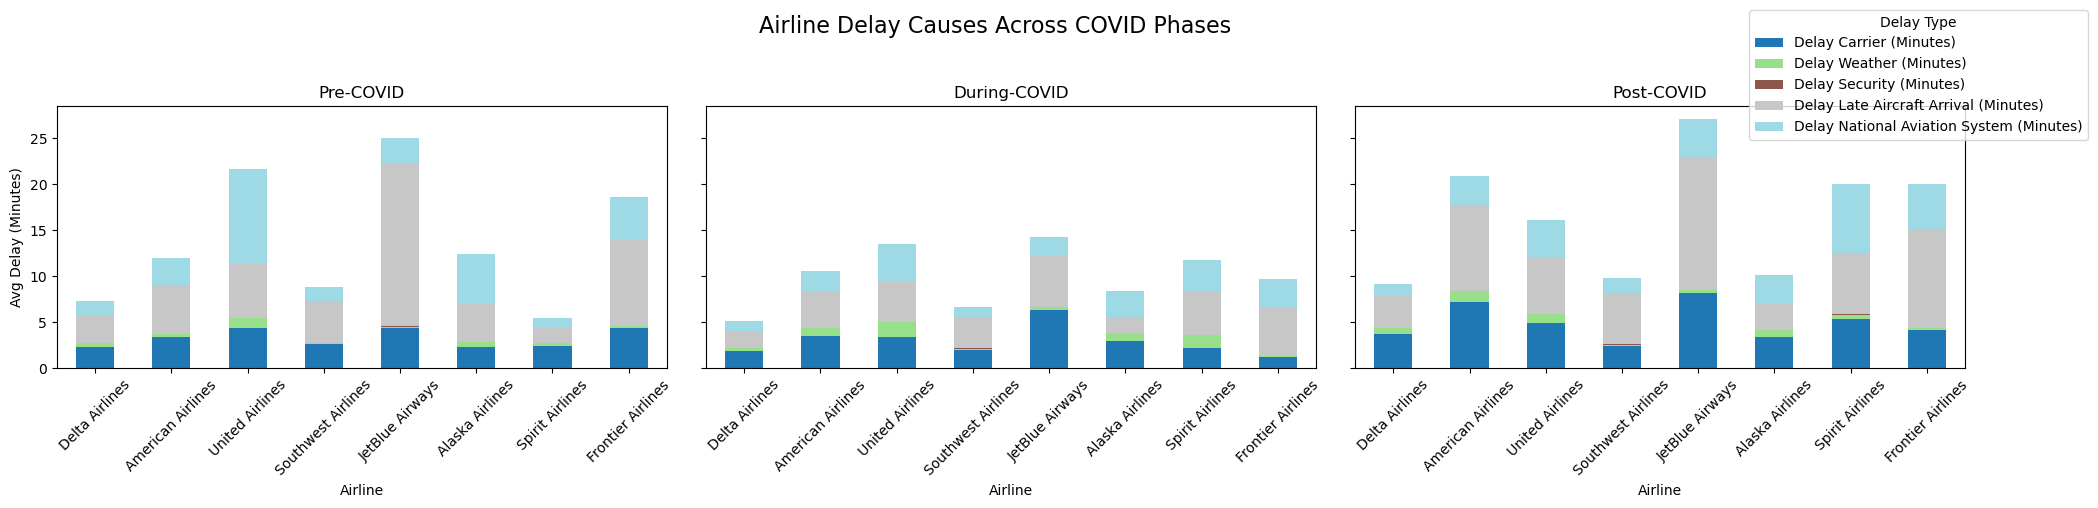

In [136]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
phases = ['Pre-COVID', 'During-COVID', 'Post-COVID']
delay_columns = [
    'Delay Carrier (Minutes)',
    'Delay Weather (Minutes)',
    'Delay Security (Minutes)',
    'Delay Late Aircraft Arrival (Minutes)',
    'Delay National Aviation System (Minutes)']
for i, phase in enumerate(phases):
    # Filter data by phase
    data = delay_causes_by_airlines[
        delay_causes_by_airlines['COVID_Phase'] == phase
    ].copy()    # Set airline as index and enforce order
    data = (
        data
        .set_index('Airlines')
        .reindex(airline_order)   # 👈 THIS enforces structure
 )

    # Plot stacked bars
    data[delay_columns].plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        colormap='tab20',
        legend=False
    )

    axes[i].set_title(phase)
    axes[i].set_xlabel('Airline')
    axes[i].set_ylabel('Avg Delay (Minutes)' if i == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)

# Single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper right',
    title='Delay Type',
    bbox_to_anchor=(1.05, 1)
)

plt.suptitle('Airline Delay Causes Across COVID Phases', fontsize=16)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.savefig('airline_delay_causes_by_phase.png', dpi=300)
plt.show()

### The analysis to identify route level delay patterns,highlighting which destination experienced higher departure and arrivals delays to and from BNA.

In [348]:
arrivals.head(2)

,Carrier Code,Airlines,Flight Date,Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Month,Year,COVID_Phase
0,AA,American Airlines,2018-01-01,829,PHL,"Philadelphia, PA",9:34:00 PM,9:29:00 PM,139,129,-5,0,0,0,0,0,2018-01-01,2018,Pre-COVID
1,AA,American Airlines,2018-01-01,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0,2018-01-01,2018,Pre-COVID


###Route level performance -Which inbound routes to BNA were more delay -prone?Are delays evenly distributed, or concentrated on certain routes?

In [349]:
top_10_origin_cities = (arrivals.groupby('Origin City').size().sort_values(ascending =False).head(10).index)

In [350]:
top_10_origin_cities

Index(['Atlanta, GA', 'Chicago, IL', 'Denver, CO', 'Dallas–Fort Worth, TX',
       'Houston, TX', 'Orlando, FL', 'Charlotte, NC', 'Detroit, MI',
       'Los Angeles, CA', 'New York, NY'],
      dtype='object', name='Origin City')

In [351]:
##Top 10 cities to BNA 
top10_arrival_cities = arrivals[arrivals['Origin City'].isin(top_10_origin_cities)]

In [352]:
top10_arrival_cities.head(1)

,Carrier Code,Airlines,Flight Date,Flight Number,Origin Airport,Origin City,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Month,Year,COVID_Phase
1,AA,American Airlines,2018-01-01,851,CLT,"Charlotte, NC",12:09:00 PM,12:05:00 PM,89,90,-4,0,0,0,0,0,2018-01-01,2018,Pre-COVID


In [353]:
city_phase_delay =(top10_arrival_cities.groupby(['Origin City','COVID_Phase'])['Arrival Delay (Minutes)'].mean().reset_index())

In [354]:
city_order = (city_phase_delay.groupby('Origin City')['Arrival Delay (Minutes)'].mean().sort_values(ascending=False).index)
city_phase_delay['Origin City'] = pd.Categorical(city_phase_delay['Origin City'],categories=city_order,ordered=True)

In [355]:
city_phase_delay

,Origin City,COVID_Phase,Arrival Delay (Minutes)
0,"Atlanta, GA",During-COVID,-1.480647
1,"Atlanta, GA",Post-COVID,3.872468
2,"Atlanta, GA",Pre-COVID,1.145599
3,"Charlotte, NC",During-COVID,-1.959226
4,"Charlotte, NC",Post-COVID,10.520165
5,"Charlotte, NC",Pre-COVID,6.507656
6,"Chicago, IL",During-COVID,0.032116
7,"Chicago, IL",Post-COVID,5.687399
8,"Chicago, IL",Pre-COVID,5.460672
9,"Dallas–Fort Worth, TX",During-COVID,1.007794


In [356]:
covid_palette = {'Pre-COVID':'#1f77b4', 'During-COVID':'#ff7f0e', 'Post-COVID':'#2ca02c'}

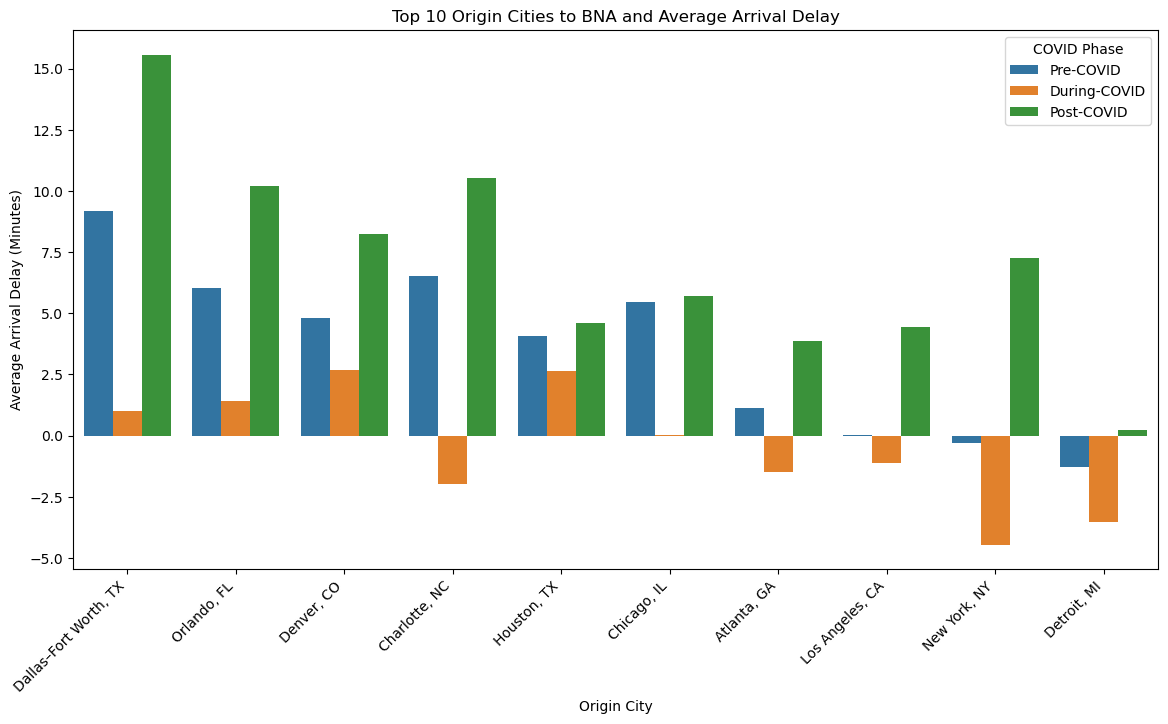

In [357]:
plt.figure(figsize=(14,7))
sns.barplot(data=city_phase_delay,x='Origin City',y='Arrival Delay (Minutes)', hue='COVID_Phase',hue_order=['Pre-COVID', 'During-COVID', 'Post-COVID'], palette=covid_palette)
plt.title('Top 10 Origin Cities to BNA and Average Arrival Delay')
plt.xlabel('Origin City')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='COVID Phase')
plt.savefig('Top10 Origin cities & avg Arrivals delays.png', dpi=300)